In [1]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import pickle

# Load the numpy arrays
X_train_preprocessed = np.load('D:/JATHURSH/Jupyter_notebook_projects/Saved_stuff_from_drowsiness_detection_project/half_data_train_test_validation_split/X_train_preprocessed.npy')

X_test_preprocessed = np.load('D:/JATHURSH/Jupyter_notebook_projects/Saved_stuff_from_drowsiness_detection_project/half_data_train_test_validation_split/X_test_preprocessed.npy')

X_val_preprocessed = np.load('D:/JATHURSH/Jupyter_notebook_projects/Saved_stuff_from_drowsiness_detection_project/half_data_train_test_validation_split/X_val_preprocessed.npy')

y_train = np.load('D:/JATHURSH/Jupyter_notebook_projects/Saved_stuff_from_drowsiness_detection_project/half_data_train_test_validation_split/y_train.npy')

y_test = np.load('D:/JATHURSH/Jupyter_notebook_projects/Saved_stuff_from_drowsiness_detection_project/half_data_train_test_validation_split/y_test.npy')

y_val = np.load('D:/JATHURSH/Jupyter_notebook_projects/Saved_stuff_from_drowsiness_detection_project/half_data_train_test_validation_split/y_val.npy')

In [2]:
# pretrained model - MobileNetV2
# all should be numpy arrays or tensors to give to MobileNetV2
"""
tf.keras.applications.mobilenet_v2.MobileNetV2(
    input_shape=None,                 # Shape of input data (MobileNets support any input size greater than 32 x 32, with larger image sizes offering better performance.) 
    alpha=1.0,                        # Width multiplier for controlling network width (default is 1.0)
    include_top=True,                 # Include fully connected top layers (default is True)
    weights='imagenet',               # Weight initialization ('imagenet' for pre-trained weights, None for random initialization)
    input_tensor=None,                # Optional input tensor (default is None)
    pooling=None,                     # Pooling type for the last layer ('avg', 'max', or None; default is None)
    classes=1000,                     # Number of output classes (default is 1000 for ImageNet)
    classifier_activation='softmax',   # Activation function for output layer (default is 'softmax')
    **kwargs                          # Additional keyword arguments
)
"""
# we dont have to set anything and keep its default values

MobileNetV2_model = tf.keras.applications.mobilenet_v2.MobileNetV2()

# Make all layers in the model non-trainable - freeze
for layer in MobileNetV2_model.layers:
    layer.trainable = False

In [3]:
# for reproducability - can be used between different runtimes
tf.random.set_seed(0)

In [4]:
base_input = MobileNetV2_model.layers[0].input

base_output = MobileNetV2_model.layers[-3].output
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()(base_output)
final_output = tf.keras.layers.Dense(1)(global_average_layer)

final_output = tf.keras.layers.Activation("sigmoid")(final_output)

In [5]:
drowsiness_detection_model = tf.keras.Model(
    inputs=base_input,
    outputs=final_output
)

In [6]:
# Compile and train the model using X_train_preprocessed as input
drowsiness_detection_model.compile(optimizer='adam', 
                                   loss='binary_crossentropy', 
                                   metrics=['accuracy'])
history_of_model = drowsiness_detection_model.fit(X_train_preprocessed, 
                               y_train, 
                               epochs=10, 
                               batch_size=8, 
                               validation_data=(X_val_preprocessed, y_val))

Epoch 1/10
3715/3715 [==============================] - 706s 189ms/step - loss: 0.1237 - accuracy: 0.9561 - val_loss: 0.0900 - val_accuracy: 0.9692
Epoch 2/10
3715/3715 [==============================] - 1363s 367ms/step - loss: 0.0839 - accuracy: 0.9714 - val_loss: 0.0815 - val_accuracy: 0.9708
Epoch 3/10
3715/3715 [==============================] - 1349s 363ms/step - loss: 0.0735 - accuracy: 0.9737 - val_loss: 0.0778 - val_accuracy: 0.9741
Epoch 4/10
3715/3715 [==============================] - 1340s 361ms/step - loss: 0.0685 - accuracy: 0.9756 - val_loss: 0.0739 - val_accuracy: 0.9742
Epoch 5/10
3715/3715 [==============================] - 1347s 363ms/step - loss: 0.0646 - accuracy: 0.9765 - val_loss: 0.0716 - val_accuracy: 0.9741
Epoch 6/10
3715/3715 [==============================] - 1096s 295ms/step - loss: 0.0611 - accuracy: 0.9776 - val_loss: 0.0743 - val_accuracy: 0.9719
Epoch 7/10
3715/3715 [==============================] - 707s 190ms/step - loss: 0.0588 - accuracy: 0.9786 -

In [7]:
# Save the model architecture and weights
drowsiness_detection_model.save('drowsiness_detection_model_1_with_10_epochs.h5')

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [8]:
# Save the history object to a file
with open('model_1_with_10_epochs_history.pkl', 'wb') as file:
    pickle.dump(history_of_model.history, file)

In [9]:
training_loss = history_of_model.history['loss']
validation_loss = history_of_model.history['val_loss']

training_accuracy = history_of_model.history['accuracy']
validation_accuracy = history_of_model.history['val_accuracy']

# Calculate the number of training epochs:
# - `len(training_loss)` calculates the length of the training_loss list, which typically
#   contains the loss value at the end of each training epoch.
# - This length tells us how many epochs the machine learning model was trained for.

# Create a range of values representing epochs:
# - `range(1, len(training_loss) + 1)` generates a Python range object starting from 1 and
#   ending at the length of the training_loss list plus one.
# - The +1 is added to ensure that the range includes values up to the number of epochs.
# - This range is often used as the x-axis when plotting training metrics against the
#   number of training iterations (epochs).
epochs = range(1, len(training_loss) + 1)

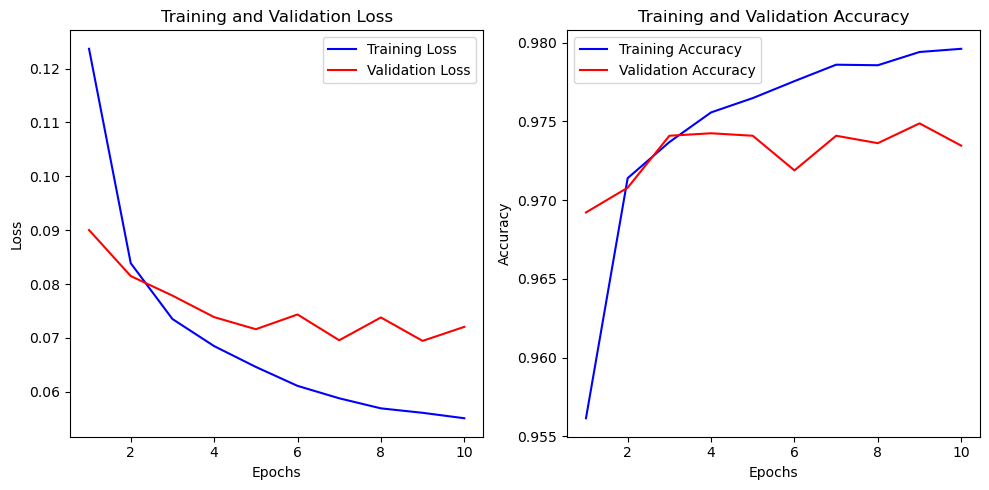

In [10]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, training_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [11]:
drowsiness_detection_model.evaluate(X_test_preprocessed, y_test)

199/199 [==============================] - 160s 799ms/step - loss: 0.0693 - accuracy: 0.9764


[0.06927096098661423, 0.9764447212219238]

In [13]:
#  predict on test data
y_pred = drowsiness_detection_model.predict(X_test_preprocessed)
# Round the predicted probabilities to 0 or 1
y_pred_binary = (y_pred >= 0.5).astype(int)

# Now, y_pred_binary contains binary predictions (0 or 1) based on the 0.5 threshold

199/199 [==============================] - 159s 776ms/step


In [14]:
y_pred_binary[:5]

array([[1],
       [1],
       [0],
       [0],
       [0]])

In [16]:
y_test[:5]

array([1, 1, 0, 0, 0])

In [17]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred_binary)

print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[3101   68]
 [  82 3117]]


In [18]:
# confusion matrix
# following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred)
    y_pred: Array of predicted labels (must be same shape as y_true)
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure
    text_size: Size of output figure text
  """
  # Create confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # number of classes

  # Plot figure
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

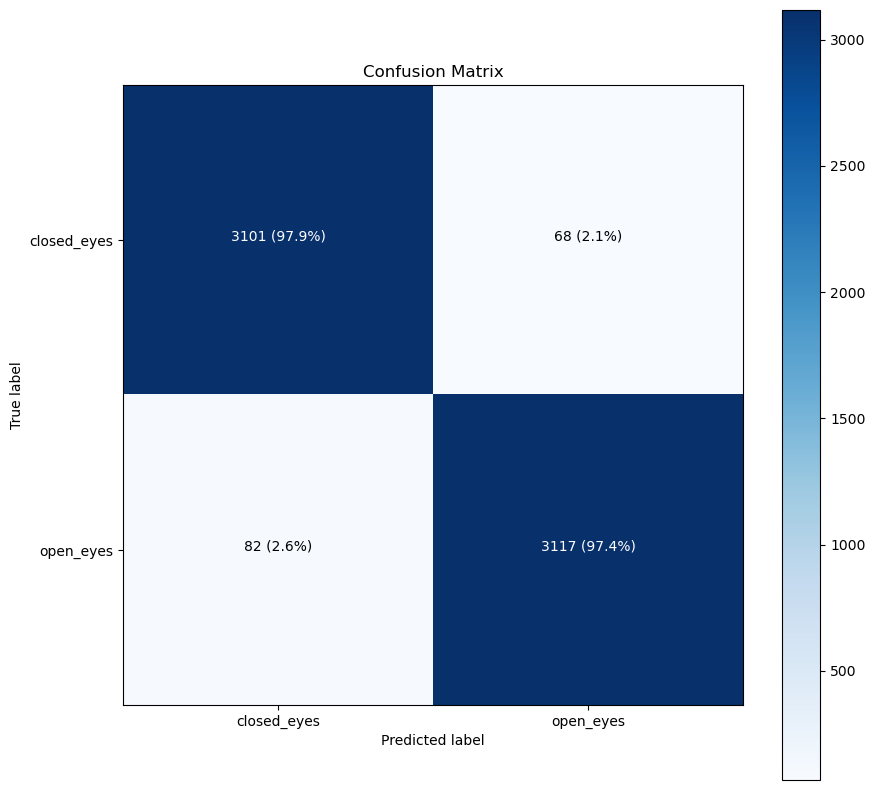

In [20]:
class_names = ["closed_eyes", "open_eyes"]
# confusion matrix from the function created
make_confusion_matrix(y_true=y_test,
                      y_pred=y_pred_binary,
                      classes=class_names,
                      figsize=(10, 10),
                      text_size=10)